## Fandango Movie Rating

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest, he found out that the actual rating was almost always rounded up to the nearest star (4.1 is rounded up to 4.5), fandango officials replied that this rounding up was caused by a bug.

**The aim of this project is to check if fandango is still inflating ratings or not**

In this project I will use two datasets:
- The first dataset is the dataset that Walt Hickey used in his analysis, the purpose of using this dataset is to analyze the characteristics of fandango's rating system previous to his analysis.
- The second dataset is a dataset available in github that has fandango's movie ratings in 2016 and 2017 that means that these ratings were collected a year after Walt Hickey's report, the purpose of using this dataset is to check wheather fandango fixed the rating system or not.

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv(r"C:\Users\youss\OneDrive\Desktop\DataQuest\Projects\Investigating Fandango Movie Ratings\fandango_score_comparison.csv")
df2 = pd.read_csv(r"C:\Users\youss\OneDrive\Desktop\DataQuest\Projects\Investigating Fandango Movie Ratings\movie_ratings_16_17.csv")

In [3]:
df1.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [5]:
before = df1[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

**`Before` DataFrame Columns Description**
- `FILM`: The film in question.
- `Fandango_Stars`: The number of stars the film had on its Fandango movie page.
- `Fandango_Ratingvalue`: The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
- `Fandango_votes`: The number of user votes the film had on Fandango.
- `Fandango_Difference`: The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue.

In [6]:
df2.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [8]:
after = df2[['movie', 'year', 'fandango']].copy()

**`After` DataFrame Columns Description**
- `movie`: the name of the movie.
- `year`: the release year of the movie.
- `fandango`: the Fandango rating of the movie (user score).

**Defining the population of our analysis**

Our goal is to determine whether there has been any change in Fandango's rating system following Hickey's analysis. The population of interest for our analysis comprises all the movie ratings stored on Fandango's website, regardless of the releasing year.

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested in describing. It seems more likely that it isn't, mostly because this sample is subject to temporal trends (e.g., movies in 2015 might have been outstandingly good or bad compared to other years).

The sampling conditions for our other sample were the following (as it can be read in the README.md of the data set's repository):

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (it's unclear how many from the README.md or from the data).

This second sample is also subject to temporal trends, and it's unlikely to be representative of our population of interest.

**Changing the goal of the project**

Because the samples we have are not representative of our population, we have two choices:
- Collect more data so the samples would be representative
- Change the goal of the project so the samples would be representative

We will go with the second choice which is changing the goal of the project.

**New Goal**

- Investigating popular movies ratings in fandango (movies that has at least 30 fan ratings) that was released in 2015 and 2016 and checking if fandango is still inflating ratings or not.

In [9]:
after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


we can see that this sample doesn't show how many fan ratings a movie got so we will search the internet for these information.

- Mechanic: Resurrection: 25,770
- Warcraft: 32,284
- Max Steel: 6,948
- Me Before You: 31,138
- Fantastic Beasts and Where to Find Them: 89,278
- Cell: 17
- Genius: 127
- Sully: 49,043
- A Hologram for the King: 10,301
- Captain America: Civil War: 187,436

About 90% of the movies in the sample are popular so we will go with it.

In [10]:
pattern = r'([(]\d+[)])'
before['year'] = before['FILM'].str.extract(pattern)
before['year'] = before['year'].str[1:5]
before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [11]:
fandango_15 = before[before['year'] == '2015']
fandango_15.sample(10, random_state=1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
138,Spare Parts (2015),4.5,4.5,450,0.0,2015
120,The Wolfpack (2015),3.5,3.4,66,0.1,2015
63,Child 44 (2015),4.0,3.7,308,0.3,2015
64,Dark Places (2015),4.0,3.7,55,0.3,2015
40,I'll See You In My Dreams (2015),4.0,3.6,281,0.4,2015
135,The Lazarus Effect (2015),3.0,3.0,1651,0.0,2015
139,Serena (2015),3.0,3.0,50,0.0,2015
42,About Elly (2015),4.0,3.6,43,0.4,2015
38,Saint Laurent (2015),3.5,3.1,43,0.4,2015
59,Mortdecai (2015),3.5,3.2,1196,0.3,2015


As mentioned in the dataset repository all movies in this dataset should have at least 30 fan ratings, the sample above proves that about 100% of the movies have 30 or more fan ratings.

In [12]:
after['year'].value_counts()

year
2016    191
2017     23
Name: count, dtype: int64

In [13]:
fandango_16 = after[after['year'] == 2016]

Now we isolated the samples that we are going to work with.

**`Fandango_15` this dataframe has movies released in 2015 and has a fan ratings of 30 at least, this is the dataset that Walt Hickey used in his analysis.**

In [14]:
fandango_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


**`Fandango_16` this dataframe has movies released in 2016 and about 90% of the movies in this dataset are popular movies (has at least 30 fan ratings)**

In [15]:
fandango_16.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Comparing Distribution Shapes for 2015 and 2016

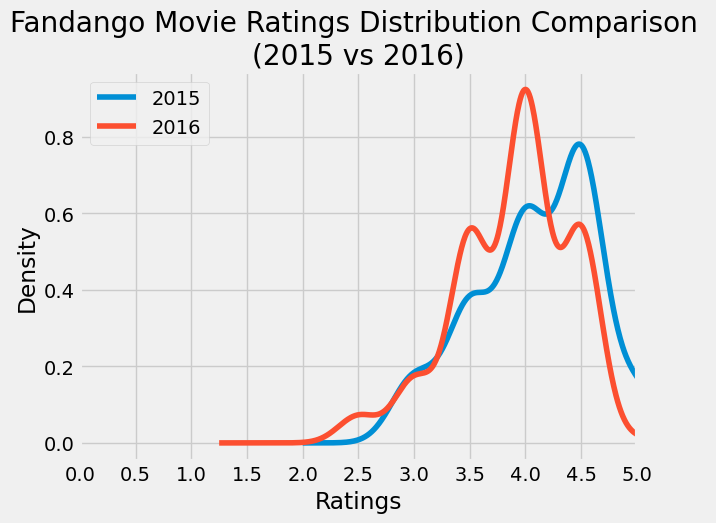

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
fandango_15['Fandango_Stars'].plot.kde(label='2015', legend=True)
fandango_16['fandango'].plot.kde(label='2016', legend=True)
plt.title('Fandango Movie Ratings Distribution Comparison \n(2015 vs 2016)')
plt.xlabel('Ratings')
plt.xlim(0,5)
plt.xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.legend()
plt.show()

From the distribution above we could see that:
- Both distributions are heavily left-skewed (that suggests that most movies on fandango are given high ratings)
- Most of 2015 movies ratings are 4.5
- Most of 2016 movies ratings are 4.0
- There are no ratings of 1 or less
- The ratings of 2016 movies are slightly lower than 2015 movies.

Let's keep investigating.

In [17]:
print('2015' + '\n' + '-' * 16)
fandango_15['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

2015
----------------


Fandango_Stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64

In [18]:
print('2016' + '\n' + '-' * 16)
fandango_16['fandango'].value_counts(normalize=True).sort_index()*100

2016
----------------


fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

Here we can see that there are some changes in the distribution:
- 2016 movies has less ratings than 2015 (2.5 instead of 3.0 in 2015)
- Higher ratings like 5.0 and 4.5 in 2016 are much lower compared to 2015
- Middle ratings like 4.0 and 3.5 in 2016 are much higher compared to 2015

Next we will try to determine the direction of the change.

In [19]:
mean15 = fandango_15['Fandango_Stars'].mean()
mean16 = fandango_16['fandango'].mean()

median15 = fandango_15['Fandango_Stars'].median()
median16 = fandango_16['fandango'].median()

mode15 = fandango_15['Fandango_Stars'].mode()[0]
mode16 = fandango_16['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean15,median15,mode15]
summary['2016'] = [mean16,median16,mode16]
summary.index = ['Mean', 'Median', 'Mode']
summary

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


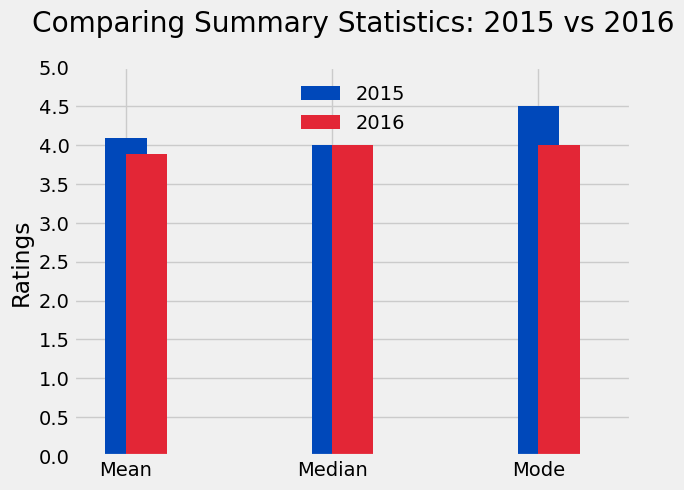

In [20]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(label = '2015', color = '#0048ba', align='center', width=0.20)
summary['2016'].plot.bar(label = '2016', color = '#e32636', align='edge',width=0.20, rot=0)
plt.title('Comparing Summary Statistics: 2015 vs 2016', y=1.07)
plt.ylim(0,5)
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.ylabel('Ratings')
plt.legend(loc='upper center', framealpha=0)
plt.show()

We can see that:
- The mean in 2016 is slightly lower with approximately 0.2 than the mean in 2015
- The median is the same in both years
- The mode in 2016 is lower than 2015 with 0.5

From that we can confirm that the movie ratings in 2016 are lower than 2015.

## Conclusion

Our analysis showed that there is a slight change in the movie ratings between 2015 and 2016, while it's not clear what caused this change, but the chances are very high that it was caused by Fandango fixing their rating system following Hickey's analysis.